# Worksheet 21

Name:  Carlos Contreras
UID:  U63425893

### Topics

- Logistic Regression
- Gradient Descent

## Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

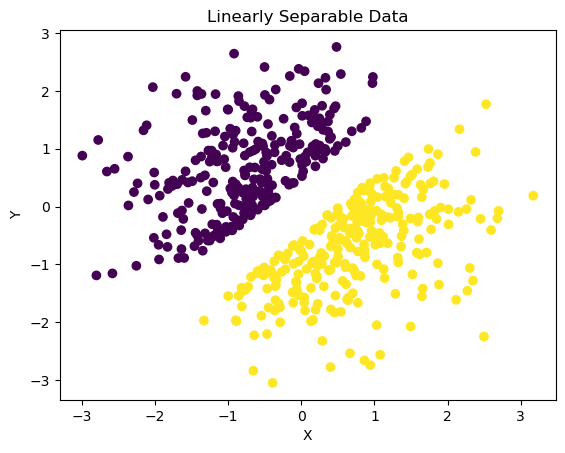

In [3]:

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

def generate_line_data():
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, Y = generate_line_data()

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linearly Separable Data')
plt.show()


b) Fit a logistic regression model to the data a print out the coefficients.

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, Y)
model.coef_
model.intercept_
model.fit(X, Y)
print("Coefficients:", model.coef_)


Coefficients: [[ 4.11337993 -4.10105513]]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

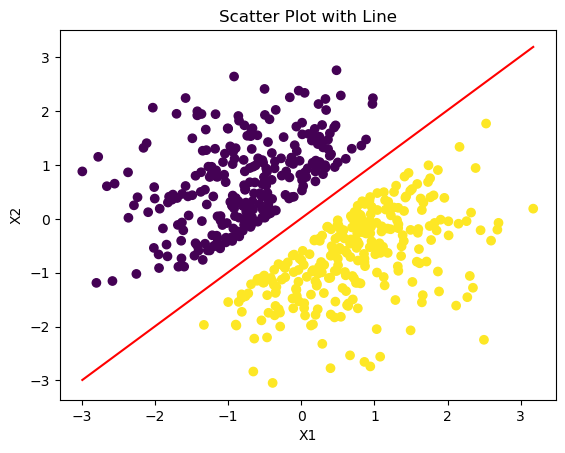

In [15]:

coef = model.coef_
intercept = model.intercept_
X_mean = np.mean(X, axis=0)

slope = -coef[0][0] / coef[0][1]
y_intercept = - (coef[0][0] * X_mean[0] + coef[0][1] * X_mean[1]) / coef[0][1]
x_line = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_line = slope * x_line + y_intercept
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
plt.plot(x_line, y_line, color='red')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot with Line')
plt.show()


d) Using the above code, generate and plot the CIRCLE data.

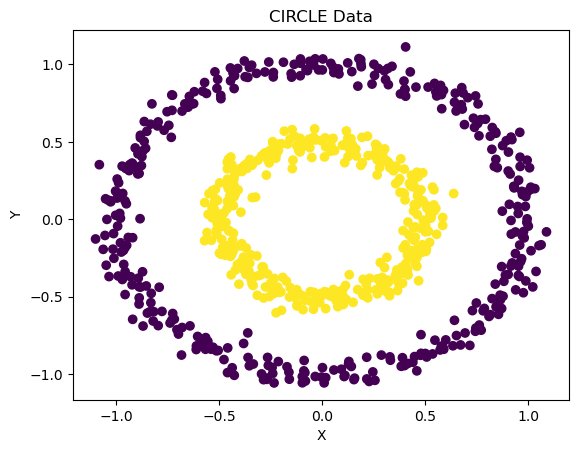

In [25]:
from sklearn.datasets import make_circles



X, Y = make_circles(n_samples=750, factor=0.5, noise=0.05)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('CIRCLE Data')
plt.show()



e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [30]:
X_elipsis = np.column_stack([X[:, 0]**2, X[:, 1]**2])
model = LogisticRegression().fit(X_elipsis, Y)

f) Plot the decision boundary using the code below.

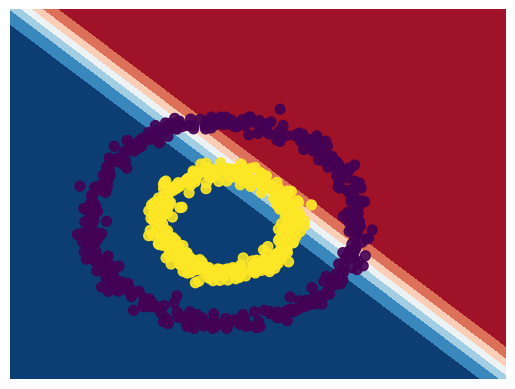

In [31]:

h = .02  
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')


ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

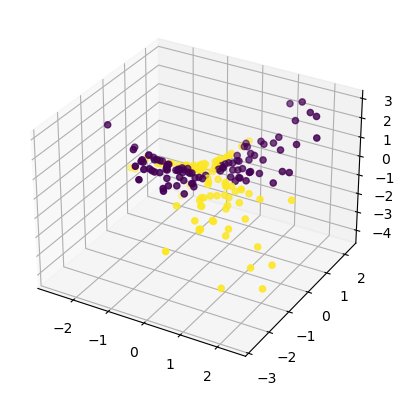

In [37]:
from mpl_toolkits.mplot3d import Axes3D


def generate_xor_data():
    rng = np.random.RandomState(0)
    X = rng.randn(200, 2)
    Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
    return X, Y


X, Y = generate_xor_data()
ax = plt.axes(projection='3d')
X3 = X[:, 0] * X[:, 1]
ax.scatter3D(X[:, 0], X[:, 1], X3, c=Y, cmap='viridis')
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

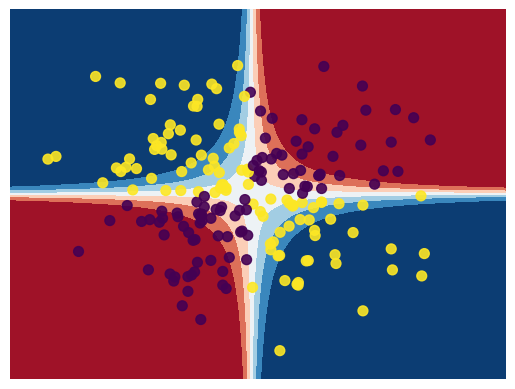

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)




h = .02 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

In [42]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

0.995
random state =  0
solver =  lbfgs
0.995
random state =  1
solver =  lbfgs
0.995
random state =  2
solver =  lbfgs
0.995
random state =  3
solver =  lbfgs
0.995
random state =  4
solver =  lbfgs
0.995
random state =  5
solver =  lbfgs
0.995
random state =  6
solver =  lbfgs
0.995
random state =  7
solver =  lbfgs
0.995
random state =  8
solver =  lbfgs
0.995
random state =  9
solver =  lbfgs
0.995
random state =  10
solver =  lbfgs
0.995
random state =  11
solver =  lbfgs
0.995
random state =  12
solver =  lbfgs
0.995
random state =  13
solver =  lbfgs
0.995
random state =  14
solver =  lbfgs
0.995
random state =  15
solver =  lbfgs
0.995
random state =  16
solver =  lbfgs
0.995
random state =  17
solver =  lbfgs
0.995
random state =  18
solver =  lbfgs
0.995
random state =  19
solver =  lbfgs
0.995
random state =  20
solver =  lbfgs
0.995
random state =  21
solver =  lbfgs
0.995
random state =  22
solver =  lbfgs
0.995
random state =  23
solver =  lbfgs
0.995
random state =  24
s

KeyboardInterrupt: 

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\Car_1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


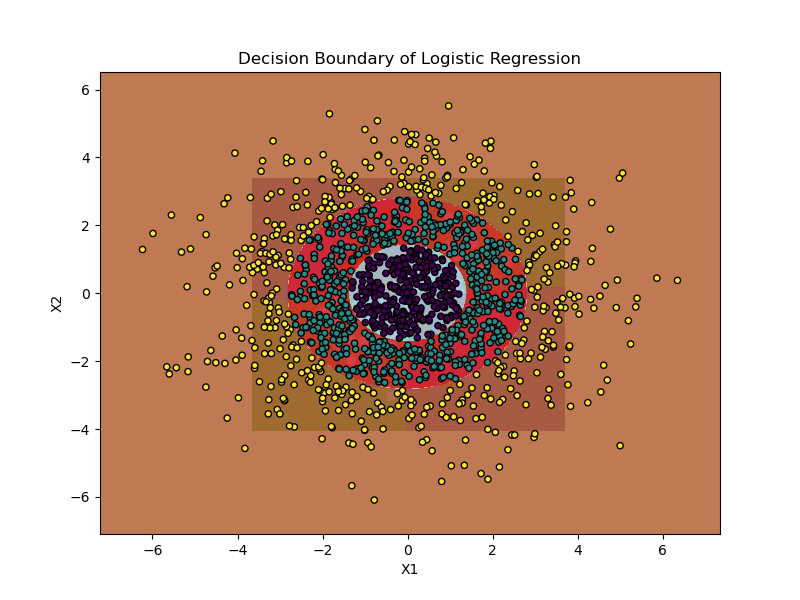

In [52]:



# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)

poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

def plot_decision_boundary(X, model, steps=1000, cmap='Paired'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps), 
                         np.linspace(y_min, y_max, steps))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary of Logistic Regression")


plot_decision_boundary(X, model)
plt.show()

## Gradient Descent

Recall in Linear Regression we are trying to find the line $$y = X \beta$$ that minimizes the sum of square distances between the predicted `y` and the `y` we observed in our dataset:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2$$

We were able to find a global minimum to this loss function but we will try to apply gradient descent to find that same solution.

a) Implement the `loss` function to complete the code and plot the loss as a function of beta.

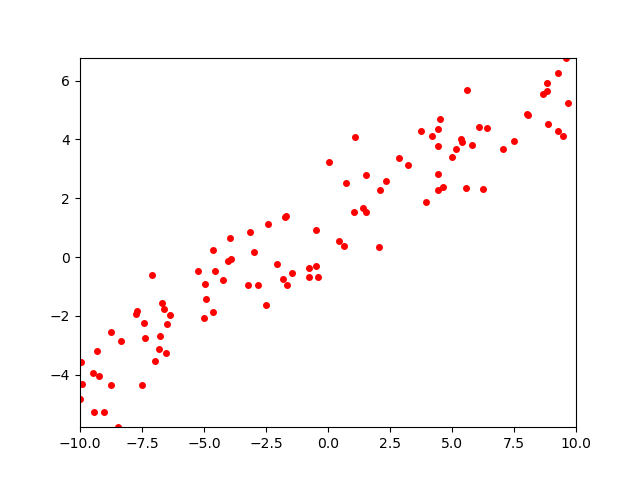

In [83]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0]+(beta[1]*xlin)+np.random.randn(100)

fig, ax = plt.subplots()
ax.plot(xlin, y,'ro',markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()




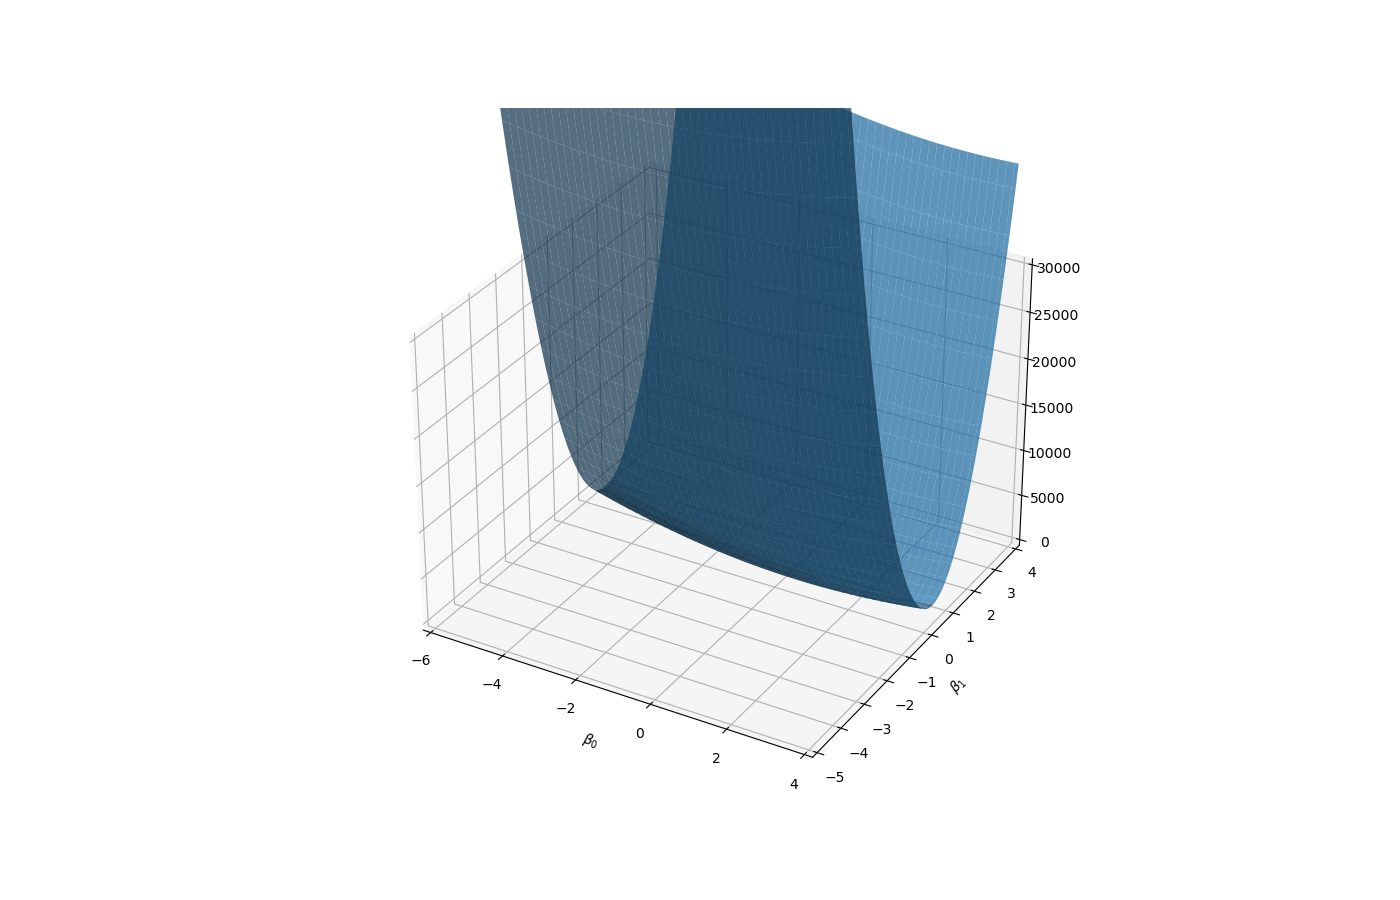

In [84]:
b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def loss(X, y, beta):
    y_pred = X @ beta
    return np.sum((y - y_pred) ** 2)
    

def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-5, 4)
ax.set_zlim(0, 30000)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

Since the loss is

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y}$$

The gradient is

$$\nabla_\beta \mathcal{L}(\mathbf{\beta}) = 2X^T X \beta - 2X^T\mathbf{y}$$

b) Implement the gradient function below and complete the gradient descent algorithm

In [86]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    return 2 * X.T @ X @ beta - 2 * X.T @ y


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.0002 # try .0005
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

c) Use the code above to create an animation of the linear model learned at every epoch.

In [87]:
def snap_model(beta):
    xplot = np.linspace(-10,10,50)
    yestplot = beta[0]+beta[1]*xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot,'b-',lw=2)
    ax.plot(xlin, y,'ro',markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'model.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

In logistic regression, the `loss` is the negative log-likelihood

$$ \mathcal{l}(\mathbf{\beta}) = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(\sigma(x_i \beta)) + (1 - y_i)\log(1 - \sigma(x_i \beta))$$

the gradient of which is:

$$\nabla_\beta \mathcal{l}(\mathbf{\beta}) = \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \sigma(x_i \beta)) $$

d) Plot the loss as a function of b.

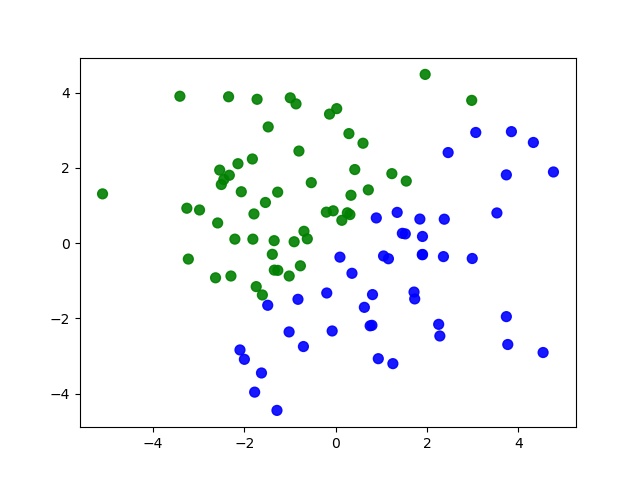

In [100]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

cs = np.array([x for x in 'gb'])
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9)
plt.show()

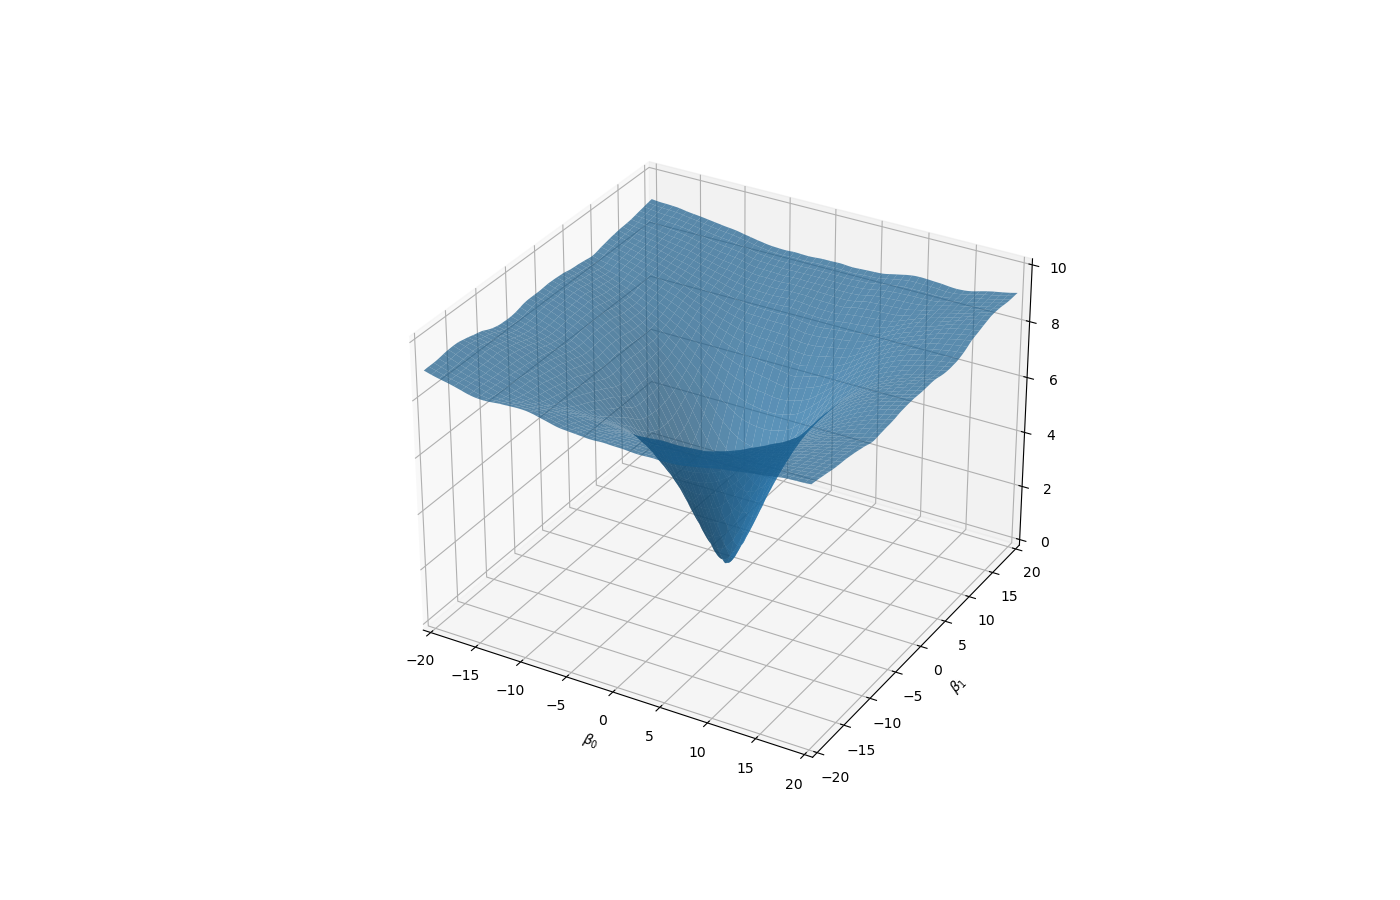

In [101]:
b0 = np.arange(-20, 20, 0.1)
b1 = np.arange(-20, 20, 0.1)
b0, b1 = np.meshgrid(b0, b1)


def sigmoid(x):
    e = np.exp(x)
    return e / (1 + e)


def loss(X, y, beta):
   beta = np.atleast_2d(beta).T
   y_pred = sigmoid(X @ beta)
   y_pred = np.clip(y_pred, 1e-9, 1 - 1e-9)
   return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-20, 20)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-20, 20)
ax.set_zlim(0, 10)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

e) Plot the loss at each iteration of the gradient descent algorithm.

In [90]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(10, 10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 10)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    predictions = sigmoid(X @ beta)
    errors = y - predictions
    grad = -X.T @ errors 
    return grad / len(y)  


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.1
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd_logit.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

f) Create an animation of the logistic regression fit at every epoch.

In [91]:
TEMPFILE = "temp.png"

X_intercept = np.insert(X, 0, 1, axis=1)
beta_start = np.zeros(X_intercept.shape[1])
learning_rate = 0.1
epochs = 100
images = []



betas, losses= gradient_descent(X_intercept, y, beta_start, learning_rate, epochs, images)

images[0].save(
    'partf.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)




g) Modify the above code to evaluate the gradient on a random batch of the data. Overlay the true loss curve and the approximation of the loss in your animation.

In [103]:
def batch_gradient(X_batch, y_batch, beta):
    predictions = sigmoid(X_batch @ beta)
    errors = y_batch - predictions
    grad = -X_batch.T @ errors
    return grad / len(y_batch)

def batch_loss(X_batch, y_batch, beta):
    predictions = sigmoid(X_batch @ beta)
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    return -np.mean(y_batch * np.log(predictions) + (1 - y_batch) * np.log(1 - predictions))

def stochastic_gradient_descent(X, y, beta_hat, learning_rate, epochs, images, batch_size):
    true_losses = [loss(X, y, beta_hat)]
    approx_losses = []
    betas = [beta_hat]

    for _ in range(epochs):
        batch_indices = np.random.choice(range(X.shape[0]), batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = batch_gradient(X_batch, y_batch, beta_hat)
        beta_hat = beta_hat - learning_rate * grad
        betas.append(beta_hat)
        true_loss = loss(X, y, beta_hat)
        approx_loss = batch_loss(X_batch, y_batch, beta_hat)
        true_losses.append(true_loss)
        approx_losses.append(approx_loss)
        images.append(snap_model_with_loss(X, y, betas, true_losses, approx_losses))

    return betas, true_losses

def snap_model_with_loss(X, y, betas, true_losses, approx_losses):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid = np.insert(grid, 0, 1, axis=1) 
    current_beta = betas[-1]
    probs = sigmoid(grid @ current_beta).reshape(xx.shape)
    
    fig, ax1 = plt.subplots()
    ax1.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolors='k', alpha=0.7)
    contour = ax1.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=1)
    ax1.clabel(contour, inline=True, fontsize=10)
    ax1.set_xlim(xx.min(), xx.max())
    ax1.set_ylim(yy.min(), yy.max())
    ax2 = ax1.twinx() 
    ax2.plot(true_losses, 'g-', label='True Loss')
    ax2.plot(approx_losses, 'b-', label='Approx. Loss')
    plt.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


TEMPFILE = "temp.png"

X_intercept = np.insert(X, 0, 1, axis=1)
beta_start = np.zeros(X_intercept.shape[1])
learning_rate = 0.1
epochs = 100
images = []
batch_size = 100
betas, true_losses = stochastic_gradient_descent(X_intercept, y, beta_start, learning_rate, epochs, images, batch_size)

images[0].save(
    'partg.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)





C:\Users\Car_1\AppData\Local\Temp\ipykernel_29800\1473039775.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


h) Below is a sandox where you can get intuition about how to tune gradient descent parameters:

In [95]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(x, y, pts, losses, grad):

    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.plot_surface(x, y, loss(np.array([x, y])), color='r', alpha=.4)
    ax.plot(np.array(pts)[:,0], np.array(pts)[:,1], losses, 'o-', c='b', markersize=10, zorder=10)
    ax.plot(np.array(pts)[-1,0], np.array(pts)[-1,1], -1, 'o-', c='b', alpha=.5, markersize=7, zorder=10)
    X, Y, Z = [pts[-1][0]], [pts[-1][1]], [-1]
    U, V, W = [-grad[0]], [-grad[1]], [0]
    ax.quiver(X, Y, Z, U, V, W, color='g')
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))




def loss(x):
    return np.sin(sum(x**2))

def gradient(x):
    return 2 * x * np.cos(sum(x**2))

def gradient_descent(x, y, init, learning_rate, epochs):
    images, losses, pts = [], [loss(init)], [init]
    for _ in range(epochs):
        grad = gradient(init)
        images.append(snap(x, y, pts, losses, grad))
        init = init - learning_rate * grad
        losses.append(loss(init))
        pts.append(init)
    return images

init = np.array([-.5, -.5]) 
learning_rate = 1.394 
x, y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1))
images = gradient_descent(x, y, init, learning_rate, 12)

images[0].save(
    'gradient_descent.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)